# 21-01 주제분석 3주차 패키지

- 주제분석 3주차 분석 툴은 Python/R 둘 다 가능합니다. 
    - 1-3주차 패키지 문제의 조건 및 힌트는 Python을 기준으로 하지만, R을 사용해도 무방합니다.
    - 다만 2/3주차의 머신러닝/딥러닝 모듈을 편하게 사용하기 위해서는 Python이 더 편할겁니다.

- 제출형식은 pdf/html/doc/ppt 등 발표가 가능하면 괜찮습니다. 하지만 html로 주시면 가장 감사합니다.

- 패키지 과제 발표는 세미나 쉬는시간 이후에 하게 되며, 역시 랜덤으로 5시00분에 발표됩니다.

- 제출기한은 목요일 자정까지이며 지각시 벌금 5000원이 있습니다. 미제출 시 만원입니다. 
    - 패키지 2회 무단 미제출 시 퇴출이니 유의해 주세요.

In [ ]:
!pip install category_encoders

     |████████████████████████████████| 81kB 5.7MB/s 


In [ ]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from category_encoders.cat_boost import CatBoostEncoder
import lightgbm as lgb
from lightgbm import LGBMModel,LGBMRegressor

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

- 이번주에 다룰 내용은 머신러닝 모델의 해석/기본적인 딥러닝입니다.
- 더불어서 다뤄지지는 내용은 randomness control입니다.
- 먼저 주어진 코드를 실행하세요.

In [ ]:
train = pd.read_csv('/gdrive/MyDrive/data/train.csv')
test=  pd.read_csv('/gdrive/MyDrive/data/test.csv')

train_x = train.drop(['price'], axis = 1)
train_y = train.loc[:, ['price']]
test_x = test.drop(['price'], axis = 1)
test_y = np.sqrt(test.loc[:, ['price']])

feature_list = list(train_x.columns)

CBE_encoder = CatBoostEncoder()
train_cbe = CBE_encoder.fit_transform(train_x[feature_list], train_y)
test_cbe = CBE_encoder.transform(test_x[feature_list])

best_lgbm_reg = LGBMRegressor(learning_rate = 0.3)
best_lgbm_reg.fit(train_cbe, train_y)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.3, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
test_cbe

,dong,apt,exclusive_use_area,floor,transaction_year,until_trans,sin_date,cos_date
0,91827.227742,89369.051084,70.80,1,5,10,-1.000000e+00,-1.836970e-16
1,91827.227742,89369.051084,94.51,8,5,10,-2.449294e-16,1.000000e+00
2,91827.227742,89369.051084,160.85,11,5,10,-2.449294e-16,1.000000e+00
3,91827.227742,89369.051084,94.51,6,5,10,1.000000e+00,3.061617e-16
4,91827.227742,89369.051084,136.40,3,5,10,1.000000e+00,3.061617e-16
...,...,...,...,...,...,...,...,...
91359,42897.089485,48238.989201,59.72,9,5,7,-1.470814e-15,-1.000000e+00
91360,42897.089485,41180.818678,59.87,12,5,9,-1.000000e+00,-3.919489e-15
91361,42897.089485,41180.818678,84.74,3,5,9,-1.000000e+00,-3.919489e-15
91362,42897.089485,41737.824622,84.74,9,5,9,-1.000000e+00,-3.919489e-15


In [ ]:
test_y

,price
0,258.843582
1,298.831056
2,331.662479
3,293.257566
4,342.052628
...,...
91359,230.217289
91360,230.217289
91361,237.697286
91362,235.584380


## 1. Interpretable ML

해석가능한 머신러닝은 모델의 결과를 해석하기 위한 방법들입니다. 보통 랜덤포레스트(Random Forest)에서 Feature(Variable) Importance에 대해 들어본 적이 있을텐데, 그것과 유사합니다. Interpretable ML 방법의 특징은 어떤 모델에도 다 적용이 가능하다는건데, SVM이나 Neural Net같이 해석이 불가능하다고 알려진 모델들도 어떤 변수들이 모델을 만드는데 있어서 주요하게 사용되었는지를 파악할 수 있게 해줍니다. 물론 회귀분석처럼 '다른 변수들을 고정시킨 상황에서 $x_1$이 한단위 증가하면 $y$가 평균적으로 $\beta_1$만큼 증가한다' 라고 말할수는 없지만요!

Feature Importance/Partial Dependence Plot/Lime/SHAP 에 대한 해석은 조금 조심해야할 필요가 있습니다. 밑의 링크의 '모델해석 및 이탈원인 분석'을 참고하면 되는데, 처음에 딱 이해하기 쉬운 개념은 아니지만 나중에 보다보면 더 이해가 잘 되실 것 같아요.

https://danbi-ncsoft.github.io/competition/2019/02/19/big-contest-2018-retrospect.html

나중에 관심있으시면 이 책을 보는 것을 추천드립니다. 저도 아직 안봄 ㅎ

https://christophm.github.io/interpretable-ml-book/

#### **오늘의 해석은 각각 방법에 입각해서 엄밀하게 해석할 필요없이, 그냥 가볍게 해석해주시면 됩니다!**

### 1.1 모델 불러오기

주어진 패키지를 불러오고, `lgbm.pkl`을 불러오세요.

In [ ]:
import pickle
import joblib
lgbm_pickle = joblib.load('/gdrive/MyDrive/data/lgbm.pkl')

### 1.2 Feature Importance 확인과 해석

- 불러온 모델에 대해 `plot_importance`함수를 통해 Feature Importance를 시각화해주세요.
- 결과에 대해 간단히 해석해주세요.

여기서 Feature Importance는 Permutation를 통한 중요도를 보는 것이 아니고, tree 모델 자체의 구성에서 어떤 변수가 지니불순도를 잘 줄였는지를 확인한 것이라고 이해해주시면 됩니다. 

(모델의 피처 중 어느 피처가 가장 중요한지 나타내는 기법이다.
특정 피처의 값을 임의의 값으로 치환했을 때 원본보다 에러가 얼마나 더 커지는지를 판단하여 중요도를 측정한다.
단, 음양의 방향이 없고, scale에 따라 모델에 미치는 영향 파악이 어려우며, 피처 간 의존성 존재 시 신뢰할 수 없다.)

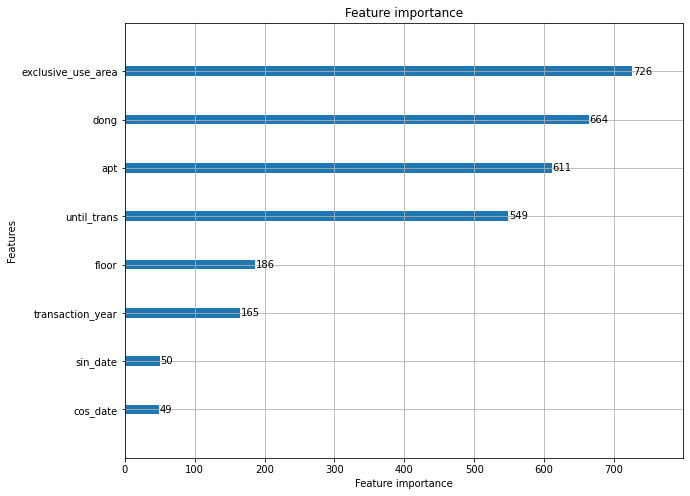

In [ ]:
from lightgbm import plot_importance
fig, ax = plt.subplots(figsize=(10,8))
plot_importance(lgbm_pickle, ax=ax)

피쳐중요도는 exclusive_use_area가 제일 높고,dong,apt,until_trans 순이다. 
위의 4가지의 피처를 선택하는 것이 좋을 것 같다.

In [ ]:
best_lgbm_reg

LGBMRegressor(learning_rate=0.3)

**이제는 불러온 모델 말고, `best_lgbm_reg`를 사용하세요.**

### 1.3 Randomness Control

- `random, numpy` 패키지의 난수를 42로 고정하세요.
- 더불어서 `os` 패키지의 난수도 고정해야합니다.

Permutation 방식의 Feature Importance를 시행한건데, permutation자체에 랜덤성이 있다보니 결과가 재현 가능하도록 시드를 고정해줍니다.

파이썬의 시드 고정은 R처럼 그냥 `set.seed()`한다고 해서 고정되지 않습니다. 전체 파이썬과 여러 패키지들의 randomness를 각각 고정해주어야 재현가능해집니다. 정말 귀찮고, 딥러닝의 경우 GPU를 사용할 경우 GPU의 계산과 관련된 시드를 고정하면 속도가 상당히 느려진다고 알려져 있습니다. 더불어서 재현도 100%되진 않으며 성능도 살짝 떨어진다고는 하지만, GPU를 사용하지 않는 경우에는 문제가 없고 최소한 할줄은 알아야겠죠?

더불어서 왜 저런식으로 복잡하게 구성이 되는가?에 대해 궁금할 수 있는데 찾아본 적은 없지만 아마도 `numpy`는 c++가 뒤에서 연산을 해주는 것으로 알고있고(그래서 빠름!), `random`은 그냥 파이썬이고, `os`는 우리 os를 건드리는 것이 아닐까....? 추측입니다 :)

In [ ]:
import random
import os

In [ ]:
np.random.seed(42)
os.environ["PYTHONHASHSEED"] = str(42)

### 1.4 Permutation Feature Importance

- permutation feature importance를 계산하기 위해 `best_lgbm_reg`를 `permutation_importance`함수를 사용해 test set에 적합하세요.
- permutation feature importance를 시각화해주세요.

위의 1.2에서는 train에서 변수중요도를 보고, 지금은 test에서 봐서 좀 이상하다고 생각할수도 있습니다. 편의를 위해, 그리고 실제로 변수중요도에 대한 부분에서 어떤 set에 대해 봐야하는지가 100% 정답처럼 있는 것은 아니라고 알고 있어요.(물론 제가 틀렸을수도!) 아무튼 너무 신경쓰지말고 해주세요!

In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
result = permutation_importance(best_lgbm_reg, test_cbe, test_y, random_state=42)

In [ ]:
vis=pd.DataFrame({'feature':feature_list,'importance':result.importances_mean})
vis

,feature,importance
0,dong,-126811.130132
1,apt,-139385.867696
2,exclusive_use_area,-153106.487880
3,floor,-13477.364741
4,transaction_year,0.000000
5,until_trans,-51303.436419
6,sin_date,1260.434312
7,cos_date,819.190059


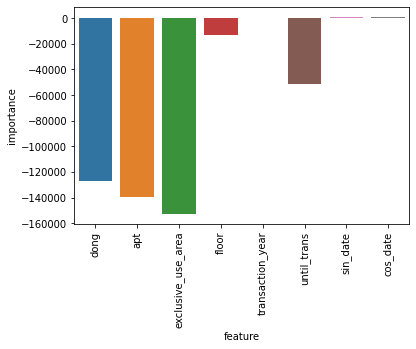

In [ ]:
sns.barplot(x=vis['feature'],y=vis['importance'],data=vis)
plt.xticks(rotation=90)
plt.show()

### 1.5 SHAP(SHapley Additive exPlanations)의 확인과 해석

- SHAP Value를 구하고 간단한 해석을 해주세요.
- `shap.TreeExplainer`, `shap_values`, `shap.summary_plot` 정도의 함수만 사용하면 됩니다.
- 결과가 좀 다른건 상관없습니다.

In [ ]:
#! pip install shap

In [ ]:
import shap

In [ ]:
explainer = shap.TreeExplainer(best_lgbm_reg) # Tree model Shap Value 확인 객체 지정
shap_values = explainer.shap_values(test_cbe) # Shap Values 계산

Glyph 8722 missing from current font.
Glyph 8722 missing from current font.


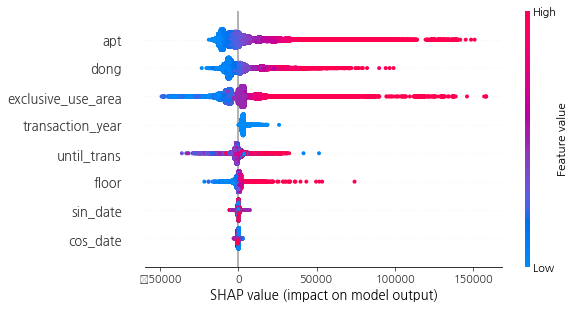

In [ ]:
shap.summary_plot(shap_values, test_cbe)

In [ ]:
apt: 변수의 값이 높을수록 price가 높은 양의 경향성이 있다
dong: 변수의 값이 높을수록 price가 높은 양의 경향성이 있다
exclusive_use_area:변수의 값이 높을수록 price가 높은 양의 경향성이 있다
transaction_year: 변수의 값이 높을수록 price가 낮은 음의 경향성이 있다
until_trans: 애매
floor:  변수의 값이 높을수록 price가 높은 양의 경향성이 있다
sin_date:
cos_date:

## 2. 딥러닝 기본

딥러닝 정말 간단히 해볼겁니다!

### 2.1 주어진 코드를 실행하고, 현재 신경망의 구조에 대해 간단히 설명해주세요.

In [ ]:
train = pd.read_csv('/gdrive/MyDrive/data/train.csv')
train_x = train.drop(['price'], axis = 1)
train_y = train.loc[:, ['price']]

val_x = train_x[train['transaction_year'] == 4]
val_y = train_y[train['transaction_year'] == 4]
train_tune_x = train_x[train['transaction_year'] < 4]
train_tune_y = train_y[train['transaction_year'] < 4]

CBE_encoder = CatBoostEncoder()
train_tune_cbe = CBE_encoder.fit_transform(train_tune_x[feature_list], train_tune_y)
val_cbe = CBE_encoder.transform(val_x[feature_list])

In [ ]:
import tensorflow as tf
import keras

from keras import models
from keras import layers
from keras.layers import Dense
from keras.optimizers import Adam

In [ ]:
def build_model():
  model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=[len(train_tune_cbe.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.0001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mse'])
  return model

In [ ]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               2304      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 20,865
Trainable params: 20,865
Non-trainable params: 0
_________________________________________________________________


완전연결계층 4개로 이루어진 모델, output이 256,64,32,1로 나오는 모델. 입력층과 출력층의 간선의 수인 파라미터는 2304,16448,2080,33개.

### 2.2 training loss와 validation loss를 시각화하세요.

- 본인 컴에서 돌리면 꽤나 돌아갈수도 있어요. 주분과 함께하려면 패키지가 코랩으로 가거나, 주분이 코랩으로 가면 한번에 투 컴을 돌릴 수 있습니다.

In [ ]:
history = model.fit(train_tune_cbe, train_tune_y, epochs=300, validation_data = (val_cbe, val_y), batch_size = 512)

Epoch 1/300
611/611 [==============================] - 5s 6ms/step - loss: 1158946824.6797 - mse: 1158946824.6797 - val_loss: 353897952.0000 - val_mse: 353897952.0000
Epoch 2/300
611/611 [==============================] - 3s 5ms/step - loss: 236818238.0915 - mse: 236818238.0915 - val_loss: 353941280.0000 - val_mse: 353941280.0000
Epoch 3/300
611/611 [==============================] - 3s 5ms/step - loss: 236517058.4837 - mse: 236517058.4837 - val_loss: 361226240.0000 - val_mse: 361226240.0000
Epoch 4/300
611/611 [==============================] - 3s 5ms/step - loss: 232124104.1046 - mse: 232124104.1046 - val_loss: 342958656.0000 - val_mse: 342958656.0000
Epoch 5/300
611/611 [==============================] - 3s 5ms/step - loss: 227027085.0458 - mse: 227027085.0458 - val_loss: 355207392.0000 - val_mse: 355207392.0000
Epoch 6/300
611/611 [==============================] - 3s 5ms/step - loss: 225501267.6078 - mse: 225501267.6078 - val_loss: 350845856.0000 - val_mse: 350845856.0000
Epoch 7/

### 2.3 어떤문제가 발생했는지 설명해주세요.

- validation mse가 338236032.0000가 lgbm보다 크다
test loss가 들쭉날쭉하다.
val_loss: 338236032.0000

힌트

- 이전에 lgbm 같은 경우 validation mse가 $1.2 * 10^8$ 이였습니다.

### 2.4 더 좋은 성능의 딥러닝 모델을 위해

- test set에 대해 딥러닝 모형의 성능을 평가하세요.
- dense 조절, batch_size 조절, regularization, dropout, batch normalization 등의 방법을 활용해 최고의 성능을 얻어보세요.
- 만약 성능의 향상이 어렵다면, 다양한 방법들을 시도하는 것을 목표로 해주세요!

In [ ]:
feature_list = list(train_x.columns)

CBE_encoder = CatBoostEncoder()
train_cbe = CBE_encoder.fit_transform(train_x[feature_list], train_y)
test_cbe = CBE_encoder.transform(test_x[feature_list])

In [ ]:
history = model.fit(train_tune_cbe, train_tune_y, epochs=300, validation_data = (val_cbe, val_y), batch_size = 256)

Epoch 1/300
1221/1221 [==============================] - 4s 4ms/step - loss: 164374752.0000 - mse: 164374752.0000 - val_loss: 225515248.0000 - val_mse: 225515248.0000
Epoch 2/300
1221/1221 [==============================] - 4s 3ms/step - loss: 164386784.0000 - mse: 164386784.0000 - val_loss: 312315296.0000 - val_mse: 312315296.0000
Epoch 3/300
1221/1221 [==============================] - 4s 3ms/step - loss: 164169504.0000 - mse: 164169504.0000 - val_loss: 307400096.0000 - val_mse: 307400096.0000
Epoch 4/300
1221/1221 [==============================] - 4s 3ms/step - loss: 163931248.0000 - mse: 163931248.0000 - val_loss: 315521408.0000 - val_mse: 315521408.0000
Epoch 5/300
1221/1221 [==============================] - 4s 3ms/step - loss: 163961984.0000 - mse: 163961984.0000 - val_loss: 260689984.0000 - val_mse: 260689984.0000
Epoch 6/300
1221/1221 [==============================] - 4s 3ms/step - loss: 163538320.0000 - mse: 163538320.0000 - val_loss: 237708784.0000 - val_mse: 237708784.000

In [ ]:
#batch size 줄이니까 val_mse 229369680.0000

In [ ]:
from keras.layers import BatchNormalization, Dropout
def build_model2():
  model2 = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=[len(train_tune_cbe.keys())]),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.0001)

  model2.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mse'])
  return model2
model2=build_model2()
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               2304      
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
dense_5 (Dense)              (None, 64)                16448     
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32)                128       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

In [ ]:
history = model2.fit(train_tune_cbe, train_tune_y, epochs=300, validation_data = (val_cbe, val_y), batch_size = 512)

Epoch 1/300
611/611 [==============================] - 7s 10ms/step - loss: 3084856298.2484 - mse: 3084856298.2484 - val_loss: 4171169792.0000 - val_mse: 4171169792.0000
Epoch 2/300
611/611 [==============================] - 6s 9ms/step - loss: 3069600261.4379 - mse: 3069600261.4379 - val_loss: 4170322176.0000 - val_mse: 4170322176.0000
Epoch 3/300
611/611 [==============================] - 6s 9ms/step - loss: 3065429398.1699 - mse: 3065429398.1699 - val_loss: 4170484224.0000 - val_mse: 4170484224.0000
Epoch 4/300
611/611 [==============================] - 6s 9ms/step - loss: 3074639480.4706 - mse: 3074639480.4706 - val_loss: 4171201280.0000 - val_mse: 4171201280.0000
Epoch 5/300
611/611 [==============================] - 6s 9ms/step - loss: 3074492075.0850 - mse: 3074492075.0850 - val_loss: 4169013248.0000 - val_mse: 4169013248.0000
Epoch 6/300
611/611 [==============================] - 6s 9ms/step - loss: 3090581196.9673 - mse: 3090581196.9673 - val_loss: 4168369664.0000 - val_mse: 4

val_mse가 훨씬 적어졌다.